# Arithmetic derivative as a sequence of states

The notion of a derivative is applicable to many domains. Here we consider it as described by E.J. Barbeau's 1961 [Remarks on an Arithmetic Derivative](https://www.cambridge.org/core/journals/canadian-mathematical-bulletin/article/remarks-on-an-arithmetic-derivative/1FD7F09AD3972692FC97BB23A21D0BD8) as a process $D()$ applied to the natural numbers that honor Leibniz's product rule for the derivative of the product of two operands, in our case the intgers $(n,m)$: 


$$
D(0) = 0 \\
D(1) = 0 \\
D(p) = 1 |  \forall p \in {prime} \\[10pt]
D(mn) = m D(n) + n D(n)\\[10pt]
$$

Lets see $D(n)$ to the first 10 integers, from [rosstta-code](https://rosettacode.org/wiki/Arithmetic_derivative):

| D(0) | D(1) | D(2) | D(3) | D(4) | D(5) | D(6) | D(7) | D(8) | D(9) |
|---|---|---|---|---|---|---|---|---|---|
|0 | 0 | 1 | 1 | 4 | 1 | 5 | 1 | 12 | 6 |



### Continuous versus discontinuous derivative 
The derivative of a continuous function over a real valued domain embodies the 'traditional' notion of a derivative. A key feature of a derivative of a continuous function is that it describes a local rate of change of a function therefore can predict how neighboring values in the domain (x) will map to the co-domain (y). That is, the slope of a line at a point (x value) points to the next value in the co-domain (y value). 

The arithmetic derivative is not a continuous function (see how the table above jumps from value to value) so it's use in optimization, which relies on continuous derivatives, is limited.

[The Arithmetic Derivative and Antiderivative](https://cs.uwaterloo.ca/journals/JIS/VOL15/Kovic/kovic4.html) by Kovič is extends the definition of the arithmetic derivative to the real, rational and complex numbers leading to a theory of partial differential equations involving the arithmetic derivative but such notions are not considered here.

Instead, we are interested in:

1. Composition of D(mn)
2. Group structure of D(n)
3. Seeing D(x) as a sequence of states

## Compositional property of the A.D. 

The arithmetic derivative provides a systematic method of composition and deconstruction with **composition as multiplication over prime numbers** and the **objects** being composed are **prime numbers**.  The [Arithmetic derivative on On-Line Encyclopedia of Integer Sequences](http://oeis.org/wiki/Arithmetic_derivative) gives a good definition showing the arithmetic derivative as a factorized representation of integer $n$:

$$
n = \prod_{i=1}^{w[n]} p_i^{e_i}
$$

where the product of factors $p_i$ are raised to their multiplicative power, $e_i$ and $w(n)$ is the number of distinct prime factors. For example, $n=18$ is the set length $w[18]=2$ of tuples of $\{(p_i,e_i)\} = (2,1), (3,2)$.

In [How to Differentiate a n Number](https://cs.uwaterloo.ca/journals/JIS/VOL6/Ufnarovski/ufnarovski.pdf) Ufnarovski and Ahlander show the arithmetic derivative may be calculated by multiplying the operand $n$ by the sum reciprocals of prime factors. The motivation here is to 'pull down' the power of the each prime factor. 

For example: $ad(9) = ad(3^2)$  = $2*3^1 = 6$. 

A fixed point example: ad(27) = ad(3^3) = 3*(3^2) = 27. From the table above we see the $D(4)=4$ is also a fixed point. 

 More generally, the arithmetic derivative of $n$ may be written as:

$$
n' = n \sum_{w(n)}^{i=1} \frac{e_i}{p_i}
$$

### Implementation in Python
Twe python versions of the arithmetic derivative are included. The first requires a prime factorization of the integer operand. The second arrives at the answer via a recursive method using the modulo operator `%` first seen at [Arithmetic Derivative on CodeGolf](https://codegolf.stackexchange.com/questions/76944/the-arithmetic-derivative).

For ease of understanding and computation, this notebook eliminates $e_i$ and instead allows representation of repeated roots. The sum of products raised to the multiplicative power is captured by just summing a list of factors that allows repeats. This is what `prinmeFactors` returns. E.g. `primeFactors(9) = [3, 3]`. This eliminates the need to account for $e_i$ in the formulas above.


## Group structure

Applying $D(\cdot)$ to the first 100 integers shows three classes of inputs:
1. Those n's that map to 1 (prime numbers)
1. Those n's that map to a sequence that arrives on a fixed point
1. Those n's that map to a sequence that on an unbounded value

The following is a table generated by repeated evaluations.

## Interpreting the arithmetic derivative as a sequence of states
Consider applying the itterative algorithm on the number prime number 5. the following internal states are encountered:
<pre>
1: (5,2)
2: (5,3)
3: (5,4)
4: (5,5)
5: (1,2)
5: (5,5)
</pre>

Here are the internal states for 27:
<pre>
1: (27,2)
2: (27,3)
3: (9,2)
4: (9,3)
5: (3,2)
6: (3,3)
7: (27,3)
</pre>

The point is that unlike a function that maps an arbitrary input
to an arbitrary output, we have a function that maps a tuple (n, p) to a series of connected nodes labeled by a tuple of integers. These intermediate tuples are generated from the recursive algorithm and represent the internal state of the system that turns an integer into it's arithmetic derivative.

### State space representation

Because of the finite and identifiable steps, we may be tempted to apply the language of state-space representation to this problem with hopes of seeing trends by analyzing the state transition matrix, $A$, associated with the state-space formulation of the algorithm:

$$
x[n+1] = A \cdot x[n] + B \cdot u[n] \\[10pt]
y[n] = C \cdot x[n] + D \cdot u[n] \\
$$

where:

| var | name | dim |
|---|----|---|
| x | state-vector |  in Z^2  |
| y |output vector | in Z  |
| u | input control vector  |  in Z^p where p = 1 |
| A | state transition matrix | n x 2  where nx2 is very sparse|
| B | input coupling matrix |   2 x 1  where n accounts for states |
| C | output coupling matrix|   1 x n  where n states reduce to output |
| D | feedthrough maxtrix|   1 x 2  but D = 0 |


Typically the state-space representation is used for three reasons:
1. eliminate noise in measurements found in $u[n]$
2. expand high ordered differential equations into set of first order equations
3. Analyze stability of system via eigenvector analysis


Since the A.D. is non-linear and it's inputs are deterministic and well ordered (e.g. the integer number line), we have no use for the state space formulation as a method of prediction. in a noisy environment.

We can, however, interpret the A matrix as a time-varying system, $A(t)$ and ask how such a $A(t)$ might be constructed so as to generate the internal states of the iterative algorithm. For example, the first state transition when calculating $D(27)$ would be of the form:

$$
1: \begin{bmatrix} 27 \\ 3 \end{bmatrix} = A\begin{bmatrix} 27 \\ 2 \end{bmatrix} \\[10pt]
2: \begin{bmatrix} 9 \\ 2 \end{bmatrix} = A\begin{bmatrix} 27 \\ 3 \end{bmatrix}\\[10pt]
3: \begin{bmatrix} 9 \\ 3 \end{bmatrix} = A\begin{bmatrix} 9 \\ 2 \end{bmatrix}
$$

In [67]:
def debug (*args):
   #print(*args)
   pass

In [68]:
def primeFactors(n):
    # The biggest factor of n has to be the largest of all factors
    # So largestFactor^2  < n  =>  only consider numbers up to sqrt(n)
    
    p = 2                       # Consider n in relation to 2 
    factors=[]
    while(n > 1 ):              # n is getting reduced
        if (n % p  == 0 ):      # when c is a factor, n/c is an integer
            factors.append(p)   # got one 
            n = n//p            # 'remove' factor by dividing 
        else:
            p = p + 1           # increase, check again
    
    return factors               # c should never be > sqrt(n)

In [69]:
def adByFactors(n):                       #arithmetic derivative
    if n == 0: return 0         # by definition 
    r=0                         # "reducer' < 1
    for m in primeFactors(n):
        r = r + 1/m             #  divides initial n without remainder  
    return round(r*n)           # reduced n to it's arithmetic derivative

In [70]:
def ad(n,p=2):
    global i
    i=i+1
    debug (f'{i}: ad at top with ({n},{p})')
    if n==0 or n==1:      # base cases
        debug (f'{i}: ad at base with ({n},{p})')
        return 0           # return 0 by defintion
    if n%p != 0:           # p does not evenly divide n
        debug (f'{i}: ad at middle with ({n},{p})')
        return ad(n,p+1)  # recursively call with p+1
    else:                  # n is a multpile of p, eg. n = m*p
        # Since p is divisor, n = mp where m is an integer
        # Definition of Arithmetic Derivative:
        #   D(mp) = p*D(m) + mD(p) 
        #   when n/p is valid: m = n/p
        # D(mp) = p * D(n/p) + m * D(p)
        # D(mp) = p * D(n/p) + (n/p) * 1
        debug (f'{i}: ad at end1 with ({n},{p})')
        reduced_der=ad(n//p)        # n//p will be an integer and less than n
        debug (f'{i}: ad at end2 with ({n},{p})')
        return p*reduced_der + n//p  # D(p) = 1 so just add reduced input

In [71]:
#assert ( sum([ad(x) - adByFactors(x) for x in range(0,50)]) == 0 )
#[ad(x) for x in range(0,50)]
i=0; ad(27) # 12

27

In [72]:
def debug(*args):
    #print (*args)
    pass

def ad2(np):
    global i
    n=np[0]
    p=np[1]
    i=i+1
    debug (f'{i}: ad2 at top with ({n},{p})')
    if n==0 or n== 1:             # base cases
        debug (f'{i}: ad2 at base with ({n},{p})')
        return (0,2)              # return 0 by defintion
    if n%p != 0:                  # p does not evenly divide n
        debug (f'{i}: ad2 at middle with ({n},{p})')
        return ad2( (n, p + 1) )  # recursively call with p+1
    else:                         # n is a multpile of p, eg. n = m*p
        pOld=p
        debug (f'{i}: ad2 at end1 with ({n},{pOld})')
        (r, p) = ad2( ( n//p,  2) )
        debug (f'{i}: ad2 at end2 with ({n},{pOld})')
        return (  pOld*r + n//pOld, pOld)  # return tuple

In [73]:
def debug(*args):
    #print (*args)
    pass

assert ( sum( [ ad2( (x,2) ) [0] - 
               ad(x) for x in range(0,28) ])) == 0

In [74]:
i=0;
def debug(*args):
    print (*args)
    
[ ad2((n,2)) for n in range(-27,-28) ]

[]

In [75]:
def debug(*args):
    #print (*args)
    pass
print(f'ad2(12,2) = {ad2((12,2))} and ad(12)={ad(12)}')

ad2(12,2) = (16, 2) and ad(12)=16


In [76]:
i=0;
def debug(*args):
    #print (*args)
    pass

adStates=[( n,  ad2((n,2))[1], ad2( (n,2) )[0],  ad(n), ad2((n,2))[0] - ad(n) ) for n in range(0,50)]


In [77]:
ad(4)

4

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

In [79]:
G = nx.Graph()
e = zip(range(0, 3), range(1, 4))
G.add_edges_from(e)

In [80]:
G.add_edges_from?

Signature: G.add_edges_from(ebunch_to_add, **attr)
Docstring:
Add all the edges in ebunch_to_add.

Parameters
----------
ebunch_to_add : container of edges
    Each edge given in the container will be added to the
    graph. The edges must be given as 2-tuples (u, v) or
    3-tuples (u, v, d) where d is a dictionary containing edge data.
attr : keyword arguments, optional
    Edge data (or labels or objects) can be assigned using
    keyword arguments.

See Also
--------
add_edge : add a single edge
add_weighted_edges_from : convenient way to add weighted edges

Notes
-----
Adding the same edge twice has no effect but any edge data
will be updated when each duplicate edge is added.

Edge attributes specified in an ebunch take precedence over
attributes specified via keyword arguments.

Examples
--------
>>> G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
>>> G.add_edges_from([(0, 1), (1, 2)])  # using a list of edge tuples
>>> e = zip(range(0, 3), range(1, 4))
>>> G.add_edg

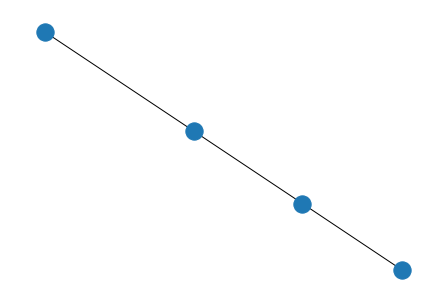

In [81]:
G.add_edges_from([(1, 2), (2, 3)], weight=3)
nx.draw(G)

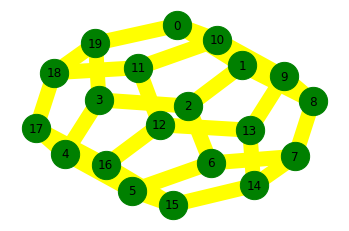

In [114]:
fig, ax = plt.subplots()
dg=nx.dodecahedral_graph()
nx.draw_networkx(dg,
                 with_labels=True,
                 node_shape='o', 
                 node_size=800, 
                 node_color='green',
                 edge_color='yellow',
                 width=15,
                nodelist=list(dg)[0:20])
ax.set_facecolor('lime')
ax.axis('off')
plt.show()

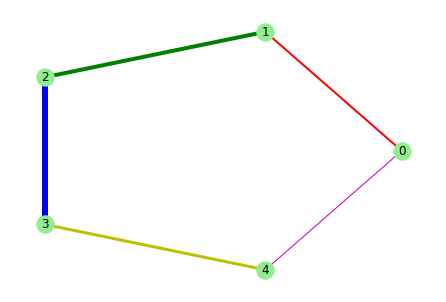

In [86]:
G = nx.Graph()
G.add_edge(0,1,color='r',weight=2)
G.add_edge(1,2,color='g',weight=4)
G.add_edge(2,3,color='b',weight=6)
G.add_edge(3,4,color='y',weight=3)
G.add_edge(4,0,color='m',weight=1)

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.circular_layout(G)
nx.draw(G, pos, 
        edge_color=colors, 
        width=list(weights),
        with_labels=True,
        node_color='lightgreen')

In [ ]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [ ]:
import random
node_list = ["A","B","C","D","E","F","G","H","E"]
def draw_number(length):
    """determines a random index number for selection."""
    from_index = random.randint(0,length)
    to_index = random.randint(0,length)
    return from_index, to_index
from_list = []
to_list = []
counter = 20
i = 0
while i < counter:
    from_index, to_index = draw_number(len(node_list)-1)
    if from_index == to_index:
        continue
    from_list.append(node_list[from_index])
    to_list.append(node_list[to_index])
    i += 1

In [ ]:
import plotly.graph_objs as go
G = nx.Graph()
for i in range(len(node_list)):
    G.add_node(node_list[i])
    G.add_edges_from([(from_list[i], to_list[i])])

In [ ]:
pos = nx.spring_layout(G, k=0.5, iterations=100)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [ ]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [ ]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='pinkyl',
        reversescale=True,
        color=[],
        size=37,
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0]
    node_trace['text'] += tuple([node_info])

In [ ]:
title = "Network Graph Demonstration"
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title=title,
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=21, l=5, r=5, t=40),
                annotations=[dict(
                    text="Text Here",
                    showarrow=False,
                    xref="paper", yref="paper")],
                xaxis=dict(showgrid=False, zeroline=False,
                           showticklabels=False, mirror=True),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, mirror=True)))
fig.show()